# KNN- Zoo

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import Dataset
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Describe the Data

In [3]:
#Describe
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

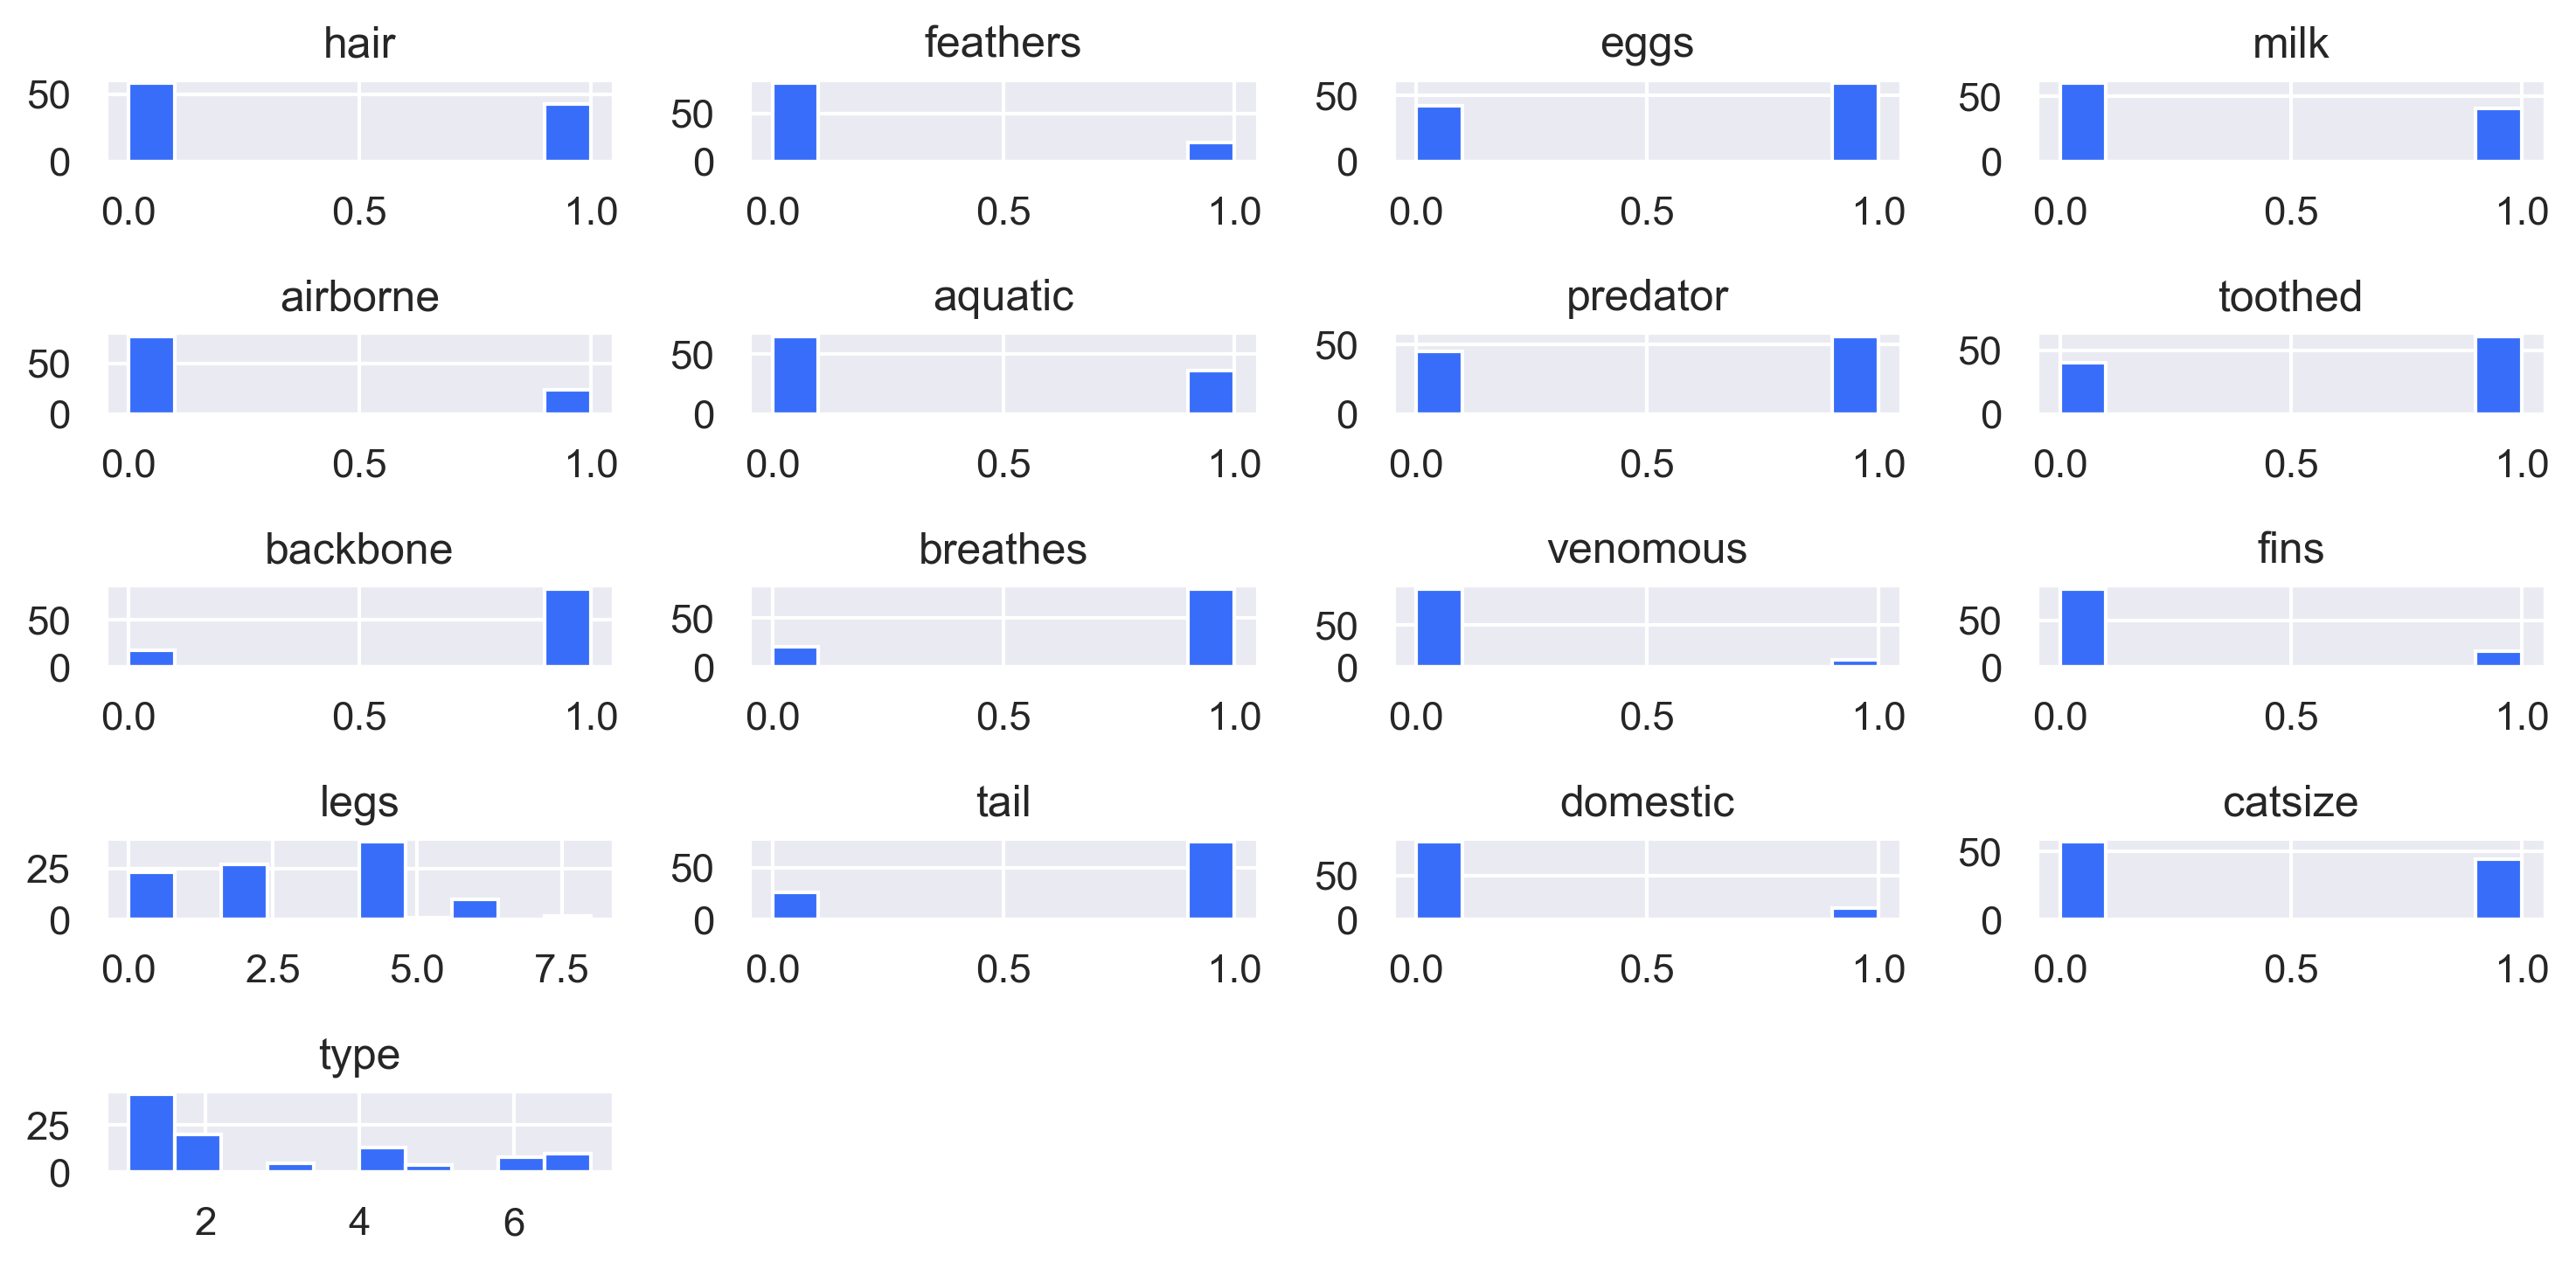

In [5]:
zoo.hist()
plt.tight_layout()

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
si = SimpleImputer (strategy= 'median')

In [8]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
x = zoo.iloc[:,1:16]

y = zoo['type']

# Model Building

In [10]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [11]:
x

array([[ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
        -1.69841555, -0.38435306],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
         0.58878406, -0.38435306],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.40443503,
         0.58878406, -0.38435306],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.57253971,
         0.58878406, -0.38435306],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.40443503,
        -1.69841555, -0.38435306],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.41594766,
         0.58878406, -0.38435306]])

In [12]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [13]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.975, 0.9047619047619048)

# Hyperparameter Tuning for knn

In [14]:
train_acc =[]
test_acc =[]

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append (knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [15]:
train_acc

[1.0,
 0.9375,
 0.975,
 0.95,
 0.9375,
 0.9375,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.85,
 0.85]

In [16]:
test_acc

[0.9523809523809523,
 0.8571428571428571,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

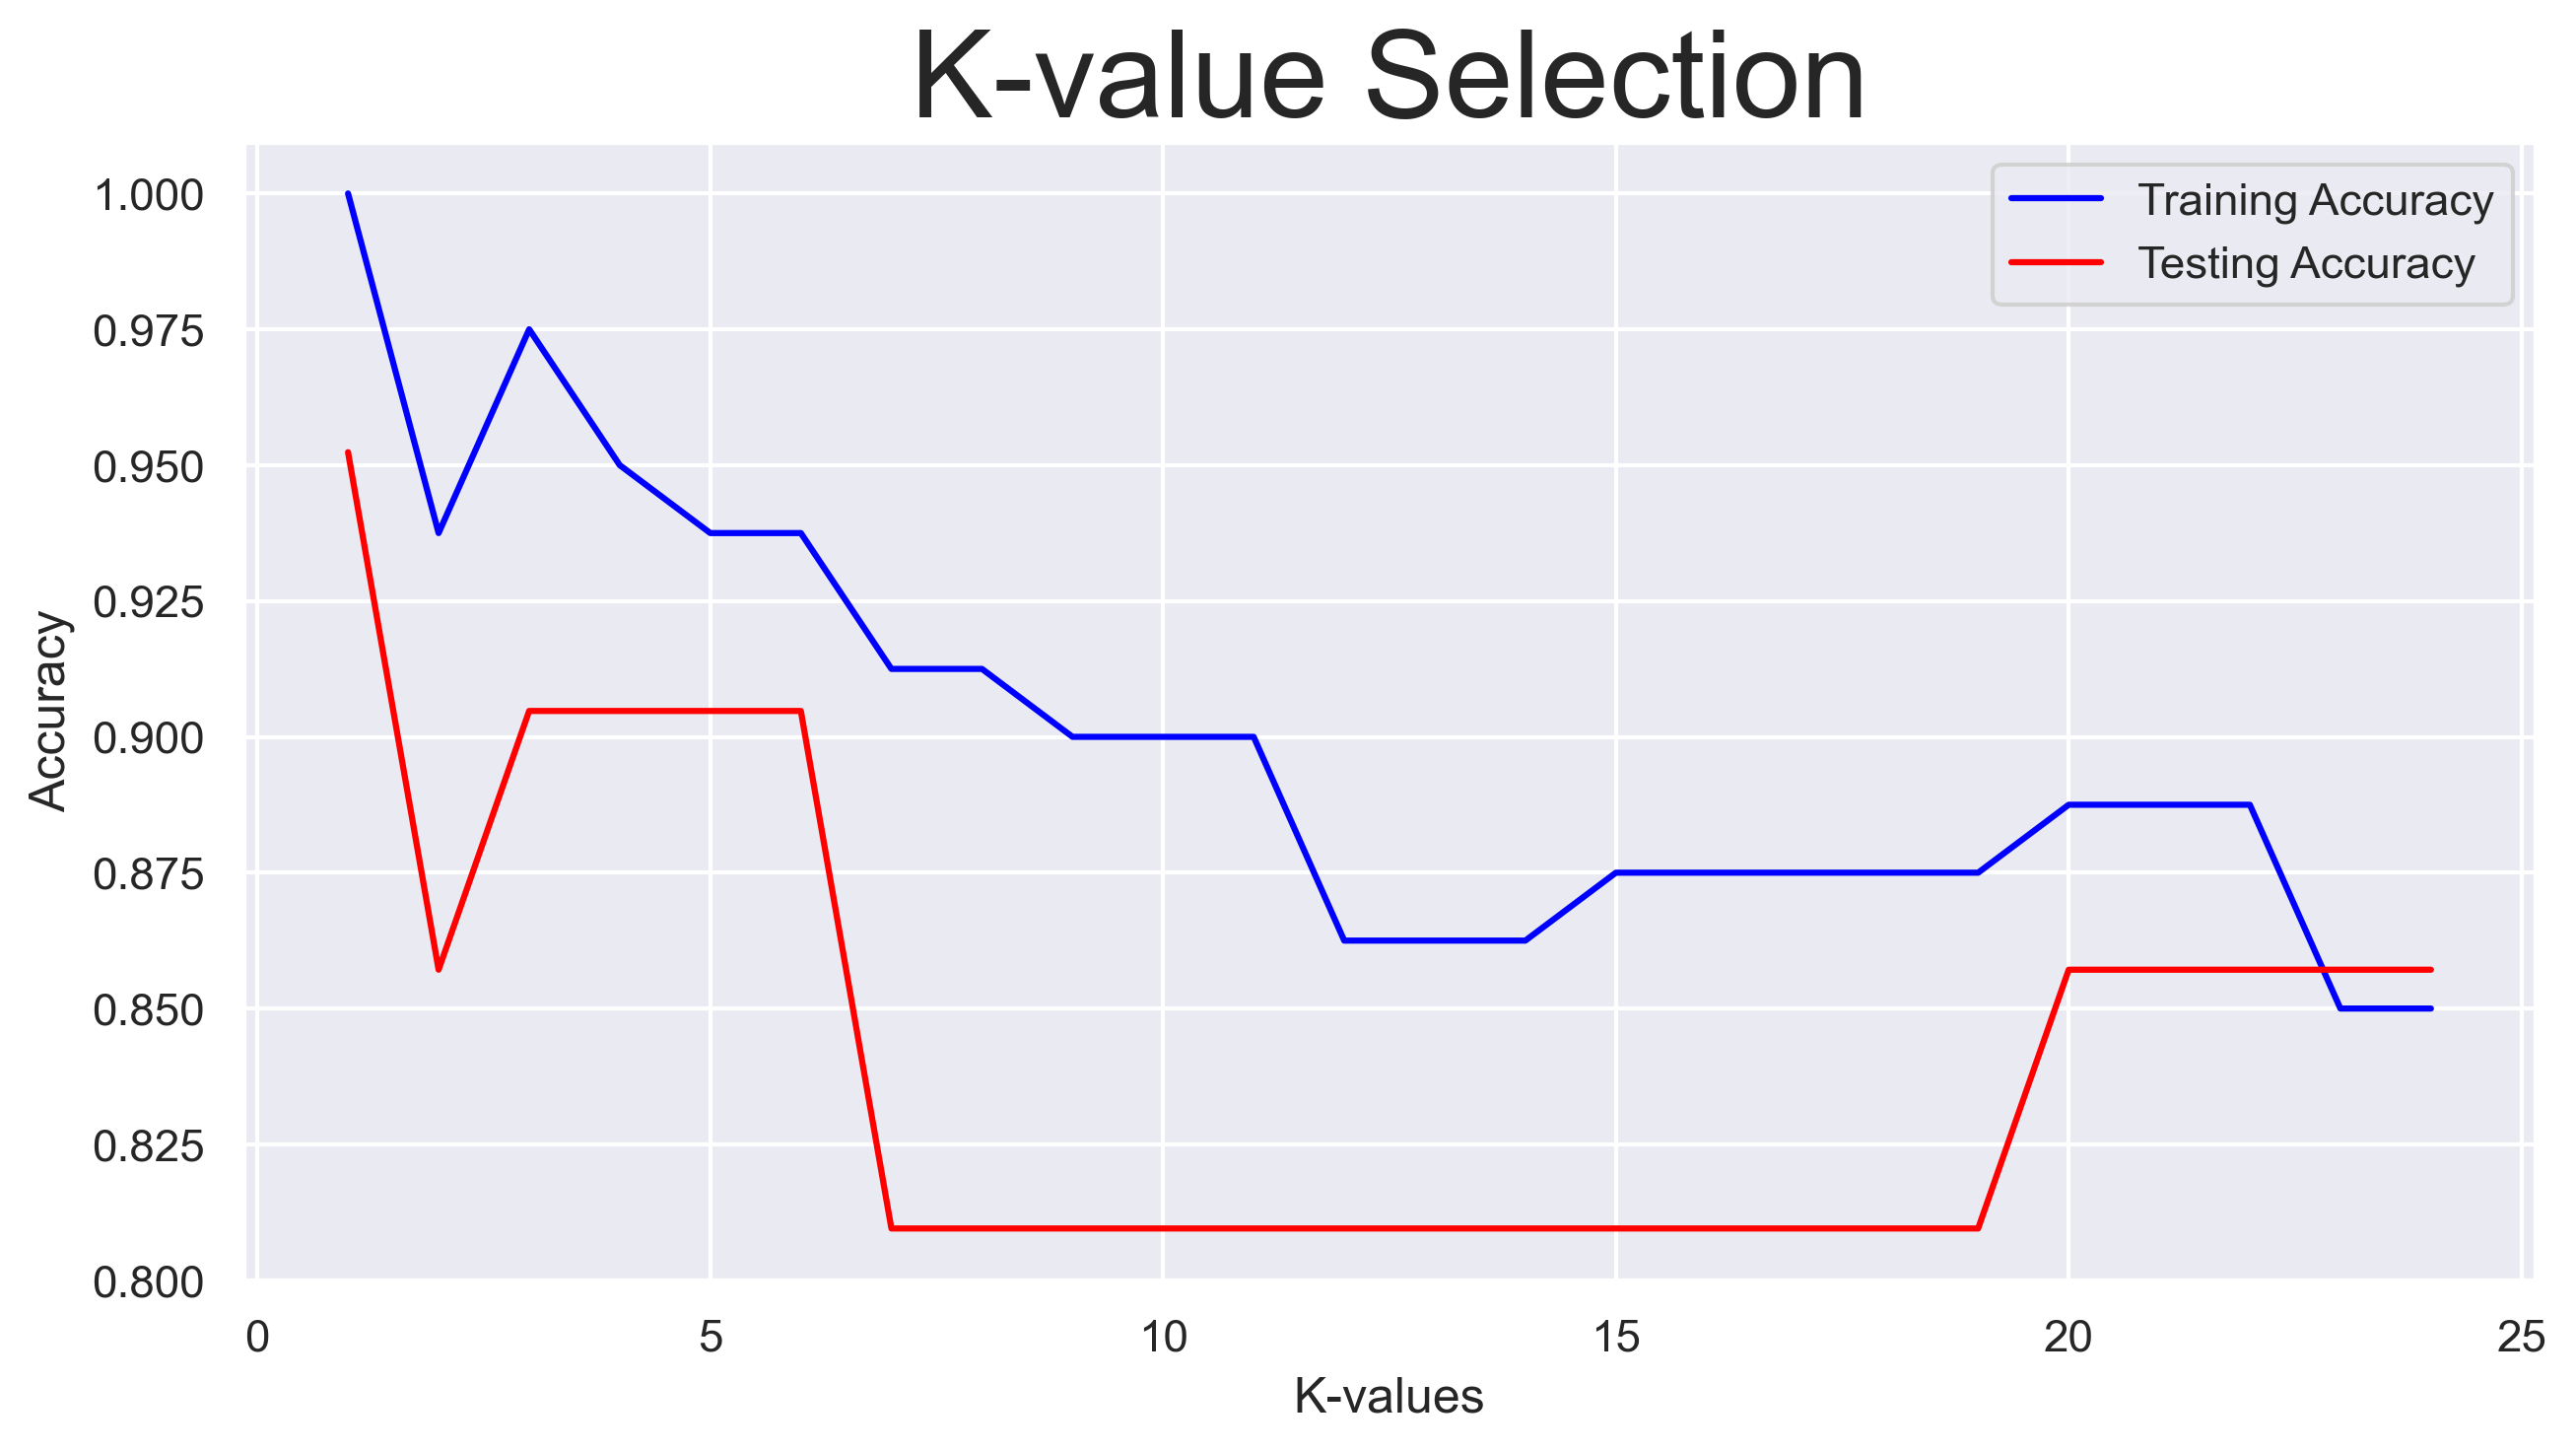

In [17]:
plt.plot(range(1,25), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,25), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.9375
Test: 0.9047619047619048


In [19]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.90        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.91      0.90      0.90        21

